# Assignment 5: Geographic Data Analysis

In this assignment, you will be using a database of geographic data provided for you in the PySal library to create two plots, a choropleth map and a proportional symbol map. In addition to these two plots, you will compute the value of Moran's I for this data.

### Dataset

The dataset to be used in this assignment is a dataset containing Per Capita incomes for the United States' lower 48 states. In addition to the state-by-state data, the dataset contains shape files for each state that you can use
to create the choropleth and proportional symbol maps.

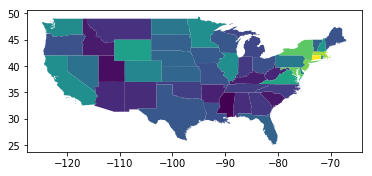

In [15]:
# Graded Part
# PartID: 5_1
# Part 1: Using the PySal Data, create a choropleth path of the United States
# that depicts the per capita income of each US state in 2009.
# Notes: The PySal and GeoPandas libraries both contain utility functions that
# may make this task easier.
import pandas as pd
import geopandas as gpd
import numpy as np
import pysal
import matplotlib.pyplot as plt
%matplotlib inline

income_df = pd.read_csv(pysal.examples.get_path("usjoin.csv"))
shapes_df = gpd.read_file(pysal.examples.get_path("us48.shp"))
merged_df = pd.merge(left=shapes_df, right=income_df, left_on="STATE_NAME", right_on="Name")
merged_df.plot(column="2009")
plt.show()

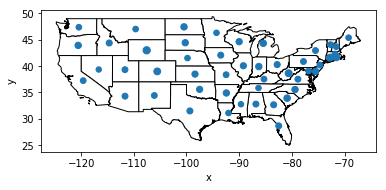

In [16]:
# Graded Part
# PartID: 5_2
# Part 2: Again using the PySal Data, create a proportional symbol map showing 
# a dot at the centroid of each state that is scaled to the per capita income 
# of each US state in 2009.
# Notes: The demonstration notebook for this unit contains code that performs 
# a similar task and may be a useful reference for your assignment.

raw_data = pysal.open(pysal.examples.get_path("usjoin.csv"))

df = gpd.read_file(pysal.examples.get_path("us48.shp"))
df['centroid_col'] = df.centroid
df['income'] = np.array(raw_data.by_col("2009"))

centroids = list(df['centroid_col'])
df2 = pd.DataFrame({'y':[centroids[i].y for i in range(len(centroids))],
                   'x':[centroids[i].x for i in range(len(centroids))],
                   'data':list(df['income'])})
base = df.plot(color='white',edgecolor='black')
df2.plot(kind='scatter',x='x', y='y',s=df2['data']*0.001, ax=base)
plt.show()

In [17]:
# Graded Part
# PartID: 5_3
# Part 3: Using the same data, compute the value of Moran's I for the per 
# capita income of each US state in 2009 using Rook Continuity. Report the 
# value of I rounded to 4 decimal places (i.e. x.XXXX)
# Notes: Again, the PySal and GeoPandas libraries may contain useful utility
# functions.
f = pysal.open(pysal.examples.get_path("usjoin.csv"))
y = np.array(f.by_col['2009'])
w = pysal.open(pysal.examples.get_path("states48.gal")).read()

mi = pysal.Moran(y, w, two_tailed=False)

print(round(mi.I,4))

0.4288
